# Word Embeddings (Different techniques to represent words as vectors)

# Overview
- What is Word Embeddings?
- Why do we need Word Embedding?
- Different types of Word Embeddings
    - Frequency based Embedding
        - Count Vectors
        - TF-IDF
        - Hashing Vectorizer
    - Prediction based Embedding
        - CBOW
        - Skip-Gram
- Training own word2vec model
- Using pretrained word2vec model
- reating Embedding model using Keras embedding
- Sentence Embedding
    - Doc2Vec of Gensim Library
    - Sen2Vec Library

# What is word embeddings?

Word embeddings transform human language meaningfully into a numerical form. The main idea here is that every word can be converted to a set of numbers – N-dimensional vector. Although every word gets assigned a unique vector i.e embedding, similar words end up having values closer to each other. For example, the vectors for the words ‘woman’ and ‘girl’ would have a higher similarity than the vectors for ‘girl’ and ‘apple’— when represented in vector space, their vectors would be at a shorter distance from each other.

# Why do we need Word Embeddings?

Many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc.

# Types of word embeddings

- Frequency based Embedding
    - Count Vectors
    - TF-IDF
- Prediction based Embedding
    - CBOW
    - Skip-Gram

## Count Vector

Count vector model learns a vocabulary from all of the documents, then models each document by counting the number of times each word appears.

For example, consider we have D documents and T is the number of different words in our vocabulary then the size of count vector matrix will be given by D*T

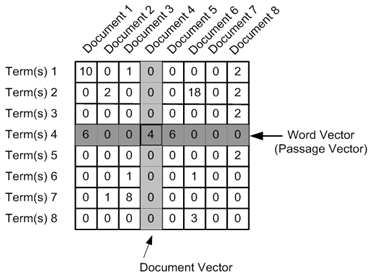

**Example:**

Let’s take the following two sentences:

Document 1: “The cat sat on the hat”

Document 2: “The dog ate the cat and the hat”

From these two documents, our vocabulary is as follows:

{ the, cat, sat, on, hat, dog, ate, and }

so D = 2, T = 8

Now, we count the number of times each word occurs in each document. In Document 1, “the” appears twice, and “cat”, “sat”, “on”, and “hat” each appear once, so the feature vector for documents is:

{ the, cat, sat, on, hat, dog, ate, and }

so the count vector matrix is :-

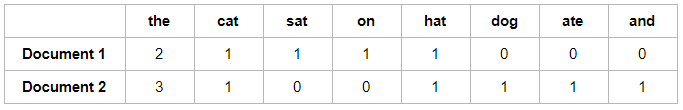

Now, a column can also be understood as word vector for the corresponding word in the matrix M. For example, the word vector for ‘cat’ in the above matrix is [1,1] and so on.Here, the rows correspond to the documents in the corpus and the columns correspond to the tokens in the dictionary

There is a problem related to dimensions of the matrix for a large corpus of text so we can use stop words (remove common words like ‘a, an, this, that’) or we can extract some top words from vocabulary based on frequency and use as a new vocabulary or we can use both methods.

### CountVectorizer

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# list of text
text=['Hi, I am Deepali and I am a Data Science Trainer']
text1= ['I am Deepali Chandel and I am welcoming you all to Learn AI']

In [2]:
vectorizer=CountVectorizer()
vectorizer.fit(text)

CountVectorizer()

In [3]:
print(vectorizer.vocabulary_)

{'hi': 4, 'am': 0, 'deepali': 3, 'and': 1, 'data': 2, 'science': 5, 'trainer': 6}


In [4]:
# encode document
newvector=vectorizer.transform(text1)
#print(newvector)
# summarize encoded vector
newvector.toarray()

array([[2, 1, 0, 1, 0, 0, 0]])

---

In [5]:
corpus = [
    'This is the first '  '.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index=['D1','D2','D3','D4'])

df

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


,and,document,first,is,one,second,the,third,this
D1,0,0,1,1,0,0,1,0,1
D2,0,2,0,1,0,1,1,0,1
D3,1,0,0,1,1,0,1,1,1
D4,0,1,1,1,0,0,1,0,1


## Hashing Vectorizer

With HashingVectorizer, each token directly maps to a column position in a matrix, where its size is pre-defined. For example, if you have 10,000 columns in your matrix, each token maps to 1 of the 10,000 columns. This mapping happens via hashing. The hash function used is called Murmurhash3.

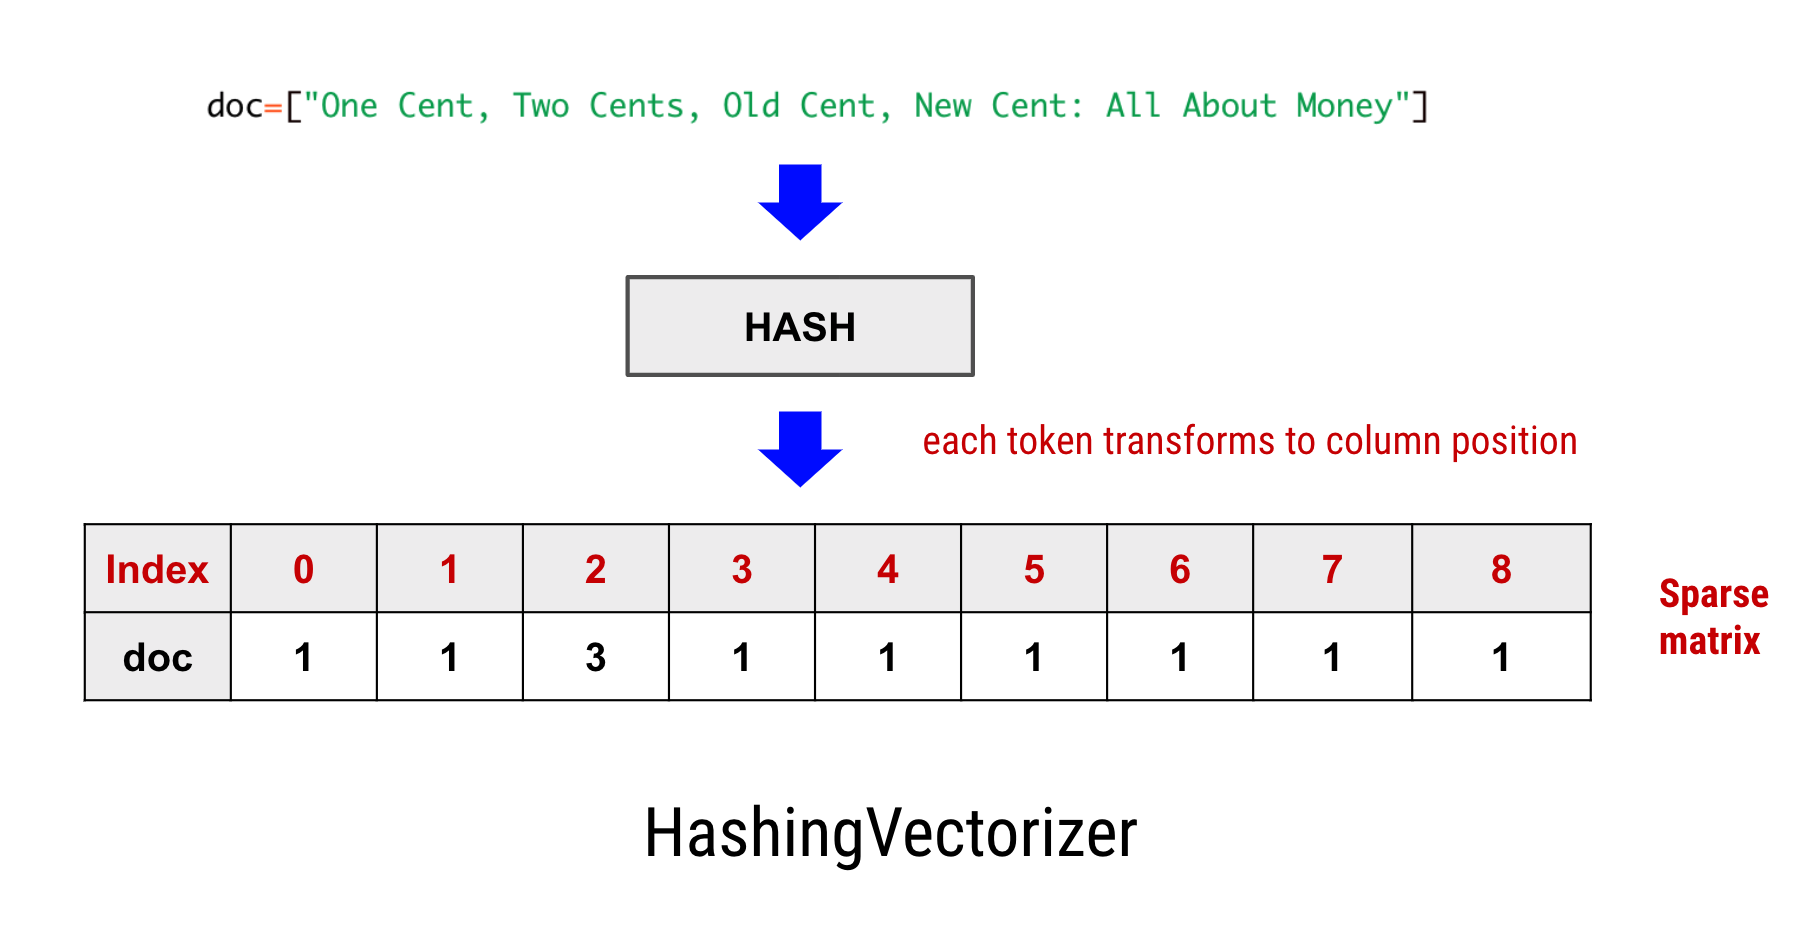

**When to use HashingVectorizer?** 

If you are using a large dataset for your machine learning tasks and you have no use for the resulting dictionary of tokens, then HashingVectorizer would be a good candidate.

The benefit of not storing the vocabulary (dictionary of tokens) is two folded. First, this is very efficient for a large dataset.

By not having to store the vocabulary, the resulting HashingVectorizer object when saved, would be much smaller and thus faster to load back into memory when needed.

In [6]:
from sklearn.feature_extraction.text import HashingVectorizer

# dataset
cat_in_the_hat_docs=[
      "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
      "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
      "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
      "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
      "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
]

hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False) 

# compute counts without any term frequency normalization 
X = hvectorizer.fit_transform(cat_in_the_hat_docs)

if your vocabulary is huge and your matrix size is small, then you are going to end up with hash collision. Meaning, two different tokens (e.g. `coffee` and `caffe`) could map to the same column position, distorting your counts. 

In [7]:
X.shape

(5, 10000)

5 documents, and a 10,000 column matrix.

In [8]:
print(X)

  (0, 93)	3.0
  (0, 689)	1.0
  (0, 717)	1.0
  (0, 1664)	1.0
  (0, 2759)	1.0
  (0, 3124)	1.0
  (0, 4212)	1.0
  (0, 4380)	1.0
  (0, 5044)	1.0
  (0, 7353)	1.0
  (0, 8903)	1.0
  (0, 8958)	1.0
  (0, 9376)	1.0
  (0, 9402)	1.0
  (0, 9851)	1.0
  (1, 689)	1.0
  (1, 717)	1.0
  (1, 1664)	1.0
  (1, 2759)	1.0
  (1, 3161)	1.0
  (1, 5044)	1.0
  (1, 6319)	1.0
  (1, 6678)	1.0
  (1, 7353)	1.0
  (1, 8256)	1.0
  :	:
  (3, 2759)	1.0
  (3, 5044)	1.0
  (3, 5111)	1.0
  (3, 5263)	1.0
  (3, 7018)	1.0
  (3, 7353)	1.0
  (3, 8958)	1.0
  (3, 9073)	1.0
  (3, 9851)	1.0
  (4, 578)	1.0
  (4, 689)	1.0
  (4, 717)	1.0
  (4, 796)	1.0
  (4, 799)	1.0
  (4, 1008)	1.0
  (4, 1664)	1.0
  (4, 2759)	1.0
  (4, 5044)	1.0
  (4, 5237)	1.0
  (4, 6286)	1.0
  (4, 7353)	1.0
  (4, 8855)	1.0
  (4, 8958)	1.0
  (4, 9492)	1.0
  (4, 9851)	1.0


In [9]:
print(X[0])

  (0, 93)	3.0
  (0, 689)	1.0
  (0, 717)	1.0
  (0, 1664)	1.0
  (0, 2759)	1.0
  (0, 3124)	1.0
  (0, 4212)	1.0
  (0, 4380)	1.0
  (0, 5044)	1.0
  (0, 7353)	1.0
  (0, 8903)	1.0
  (0, 8958)	1.0
  (0, 9376)	1.0
  (0, 9402)	1.0
  (0, 9851)	1.0


if you need access to the actual tokens, then again CountVectorizer is the more appropriate choice.

The downside of using hash vectorizer is that it will not be possible to retrieve the actual token given the column position. This would be especially important in tasks like keyword extraction, where you want to retrieve and use the actual tokens.

## TF-IDF

Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency.

- TF(w) = (Number of times term w appears in a document) / (Total number of terms in the document)
- IDF(w) = log_e(Total number of documents / Number of documents with term w in it)
- TF-IDF(t, document) = TF(t, document) * IDF(t)

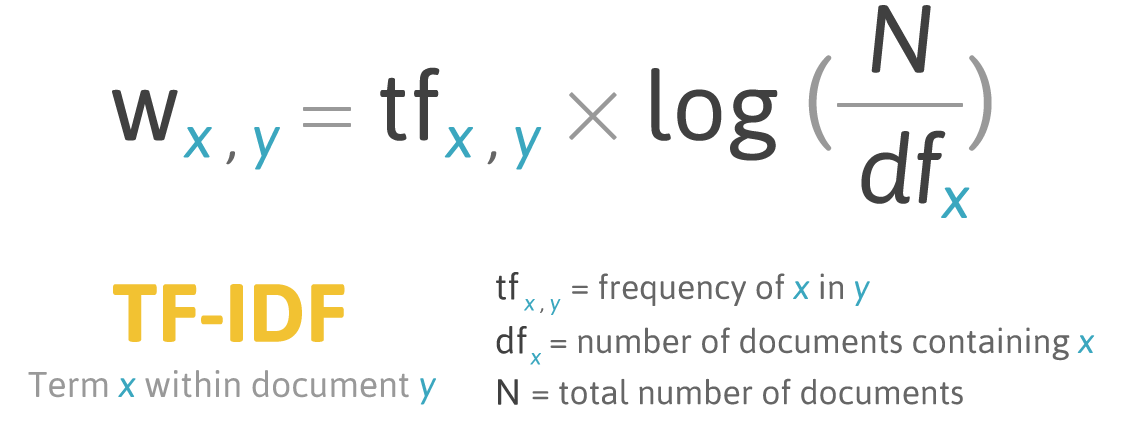


- TF (Term frequency) : Reward words having high occurrence in a document [Frequent]

- IDF (Inverse Document Frequency) : Penalize words appearing many times in a document collection. Too general words should not have have high weight eg. "or" "not" "is" "the" [Reward Rarity].

- Hence word rare in a document collection but frequent in a particular document get high weight.

- In other word, combining TF and IDF together => assign high weight to discriminative words in a document

For a text document representation TFIDF is a well established technique.

**Example**

Let's say you have a 100 word blog post with the word "JavaScript" in it 5 times. The calculation for the Term Frequency would be:

 TF = 5/100 = 0.05
 
Next, assume your entire collection of blog posts has 10,000 documents and the word "JavaScript" appears at least once in 100 of these. The Inverse Document Frequency calculation would look like this:

 IDF = log(10,000/100) = 2
 
To calculate the TF-IDF, we multiply the previous two values. This gives us the final score:

 TF-IDF = 0.05 * 2 = 0.1
 
If 'smooth_idf=True' (the default), the constant "1" is added to the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions: 

idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1.

so for above one TF-TDF=0.05 *( log( (10,000+1) / (100+1) ) +1 )

### TF-IDF Vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# list of texts
text= ['Hi, I am Deepali and I am a Data Science Trainer kk',
'I am Deepali Chandel and I welcome you all to Learn AI kk', 
'Welcome to word embedding lectures kk']

In [11]:
# create the transform
vectorizer=TfidfVectorizer()

# tokenize and build vocab
X=vectorizer.fit_transform(text)
print(X)

  (0, 9)	0.2112143677790474
  (0, 14)	0.3576170112988455
  (0, 12)	0.3576170112988455
  (0, 5)	0.3576170112988455
  (0, 3)	0.2719769548333164
  (0, 6)	0.2719769548333164
  (0, 2)	0.5439539096666328
  (0, 8)	0.3576170112988455
  (1, 0)	0.3483490760920491
  (1, 10)	0.3483490760920491
  (1, 13)	0.2649284512233174
  (1, 1)	0.3483490760920491
  (1, 17)	0.3483490760920491
  (1, 15)	0.2649284512233174
  (1, 4)	0.3483490760920491
  (1, 9)	0.20574057594735834
  (1, 3)	0.2649284512233174
  (1, 6)	0.2649284512233174
  (1, 2)	0.2649284512233174
  (2, 11)	0.4711101009983051
  (2, 7)	0.4711101009983051
  (2, 16)	0.4711101009983051
  (2, 13)	0.35829137488557944
  (2, 15)	0.35829137488557944
  (2, 9)	0.2782452148327134


In [12]:
vectorizer.get_feature_names()

['ai',
 'all',
 'am',
 'and',
 'chandel',
 'data',
 'deepali',
 'embedding',
 'hi',
 'kk',
 'learn',
 'lectures',
 'science',
 'to',
 'trainer',
 'welcome',
 'word',
 'you']

In [13]:
print(X.shape)
    
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index=['D1','D2','D3'])

df

(3, 18)


,ai,all,am,and,chandel,data,deepali,embedding,hi,kk,learn,lectures,science,to,trainer,welcome,word,you
D1,0.000000,0.000000,0.543954,0.271977,0.000000,0.357617,0.271977,0.00000,0.357617,0.211214,0.000000,0.00000,0.357617,0.000000,0.357617,0.000000,0.00000,0.000000
D2,0.348349,0.348349,0.264928,0.264928,0.348349,0.000000,0.264928,0.00000,0.000000,0.205741,0.348349,0.00000,0.000000,0.264928,0.000000,0.264928,0.00000,0.348349
D3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.47111,0.000000,0.278245,0.000000,0.47111,0.000000,0.358291,0.000000,0.358291,0.47111,0.000000


In [14]:
print(vectorizer.vocabulary_)

{'hi': 8, 'am': 2, 'deepali': 6, 'and': 3, 'data': 5, 'science': 12, 'trainer': 14, 'kk': 9, 'chandel': 4, 'welcome': 15, 'you': 17, 'all': 1, 'to': 13, 'learn': 10, 'ai': 0, 'word': 16, 'embedding': 7, 'lectures': 11}


In [15]:
print(vectorizer.idf_)

[1.69314718 1.69314718 1.28768207 1.28768207 1.69314718 1.69314718
 1.28768207 1.69314718 1.69314718 1.         1.69314718 1.69314718
 1.69314718 1.28768207 1.69314718 1.28768207 1.69314718 1.69314718]


In [16]:
import numpy as np
np.log((3+1)/(1+1))+1

1.6931471805599454

---

In [17]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first the document.',
    'This document is the second document.',
    'And This is the third one.',
    'Is This the first document?',
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(X)

print(vectorizer.get_feature_names())

print(X.shape)
    
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index=['D1','D2','D3','D4'])

df

  (0, 1)	0.3911446921950442
  (0, 2)	0.4831415110134742
  (0, 6)	0.6395728314551106
  (0, 3)	0.3197864157275553
  (0, 8)	0.3197864157275553
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


,and,document,first,is,one,second,the,third,this
D1,0.000000,0.391145,0.483142,0.319786,0.000000,0.000000,0.639573,0.000000,0.319786
D2,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
D3,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
D4,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


## Applications of frequency based methods:
* Easy to understand 
* Many applications of them like 
    * text classification, 
    * sentiment analysis and many more. 
* Because they extract positive and negative words from the text so we can easily classify them with the help of any good machine learning algorithms.



## Prediction based Embedding

The algorithm exists in two flavors CBOW and Skip-Gram. Given a set of sentences (also called corpus) the model loops on the words of each sentence and either tries to use the current word of to predict its neighbors (its context), in which case the method is called “Skip-Gram”, or it uses each of these contexts to predict the current word, in which case the method is called “Continuous Bag Of Words” (CBOW). The limit on the number of words in each context is determined by a parameter called “window size”.

Word2Vec is an efficient solution to these problems, which leverages the context of the target words. Essentially, we want to use the surrounding words to represent the target words with a Neural Network whose hidden layer encodes the word representation.

When you're dealing with language and words, you end up with tens of thousands of classes to predict, one for each word. Trying to one-hot encode these words is massively inefficient, you'll have one element set to 1 and the other 50,000 set to 0. The word2vec algorithm finds much more efficient representations by finding vectors that represent the words. These vectors also contain semantic information about the words. Words that show up in similar contexts, such as "black", "white", and "red" will have vectors near each other. There are two architectures for implementing word2vec, CBOW (Continuous Bag-Of-Words) and Skip-gram.

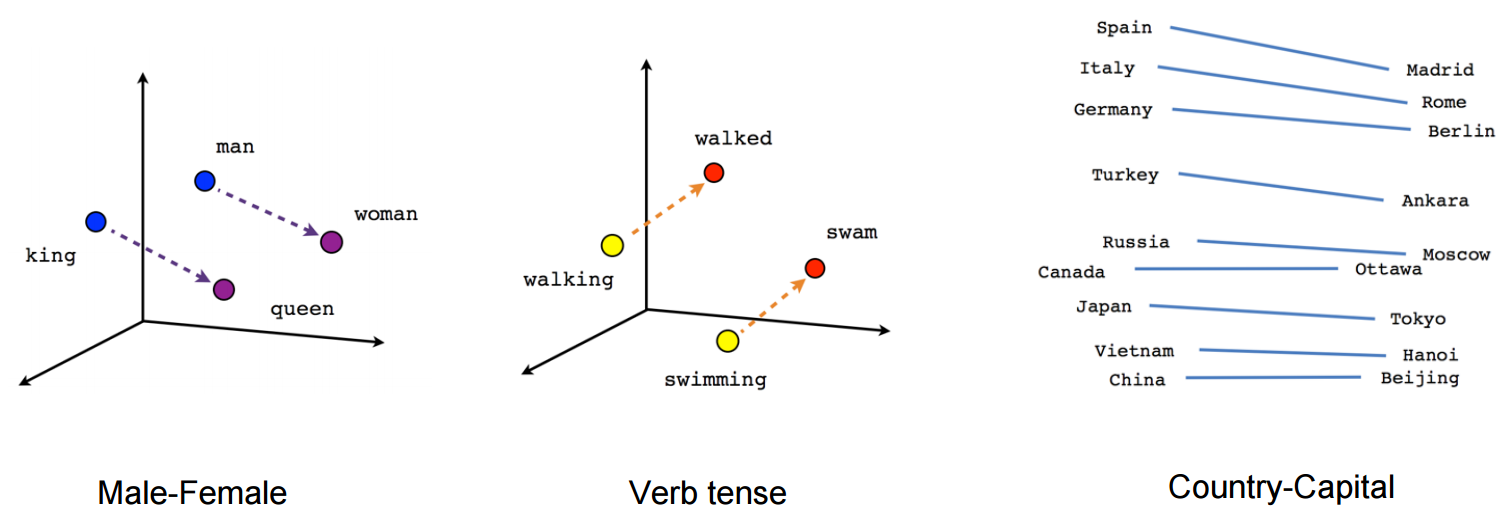

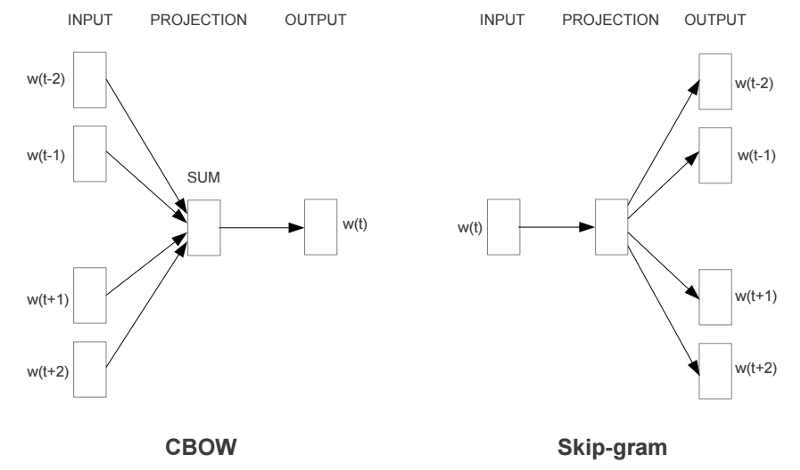

### Continuous Bag of Words (CBOW)

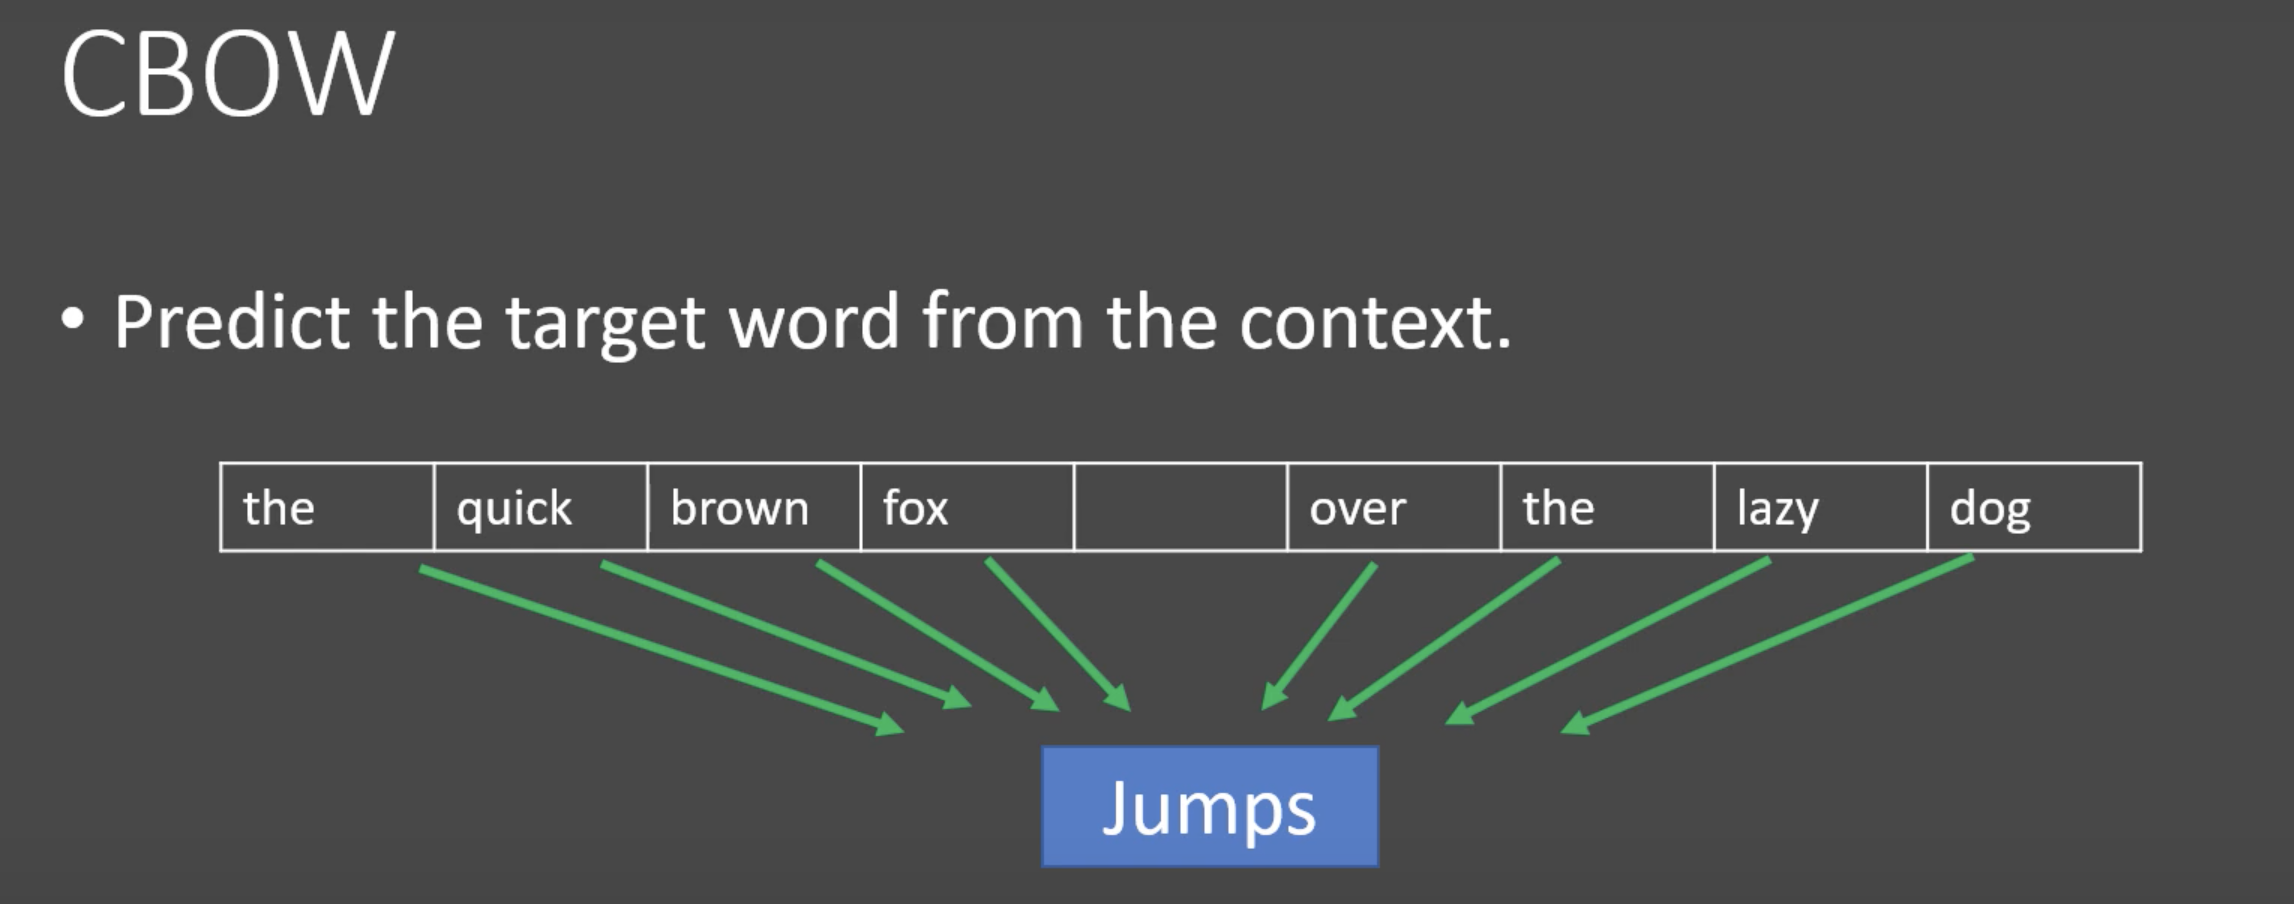

The input to the model could be 𝑤𝑖−2,𝑤𝑖−1,𝑤𝑖+1,𝑤𝑖+2, the preceding and following words of the current word we are at. The output of the neural network will be 𝑤𝑖. Hence you can think of the task as

>**"predicting the word given its context"**

Note that the number of words we use depends on your setting for the window size.

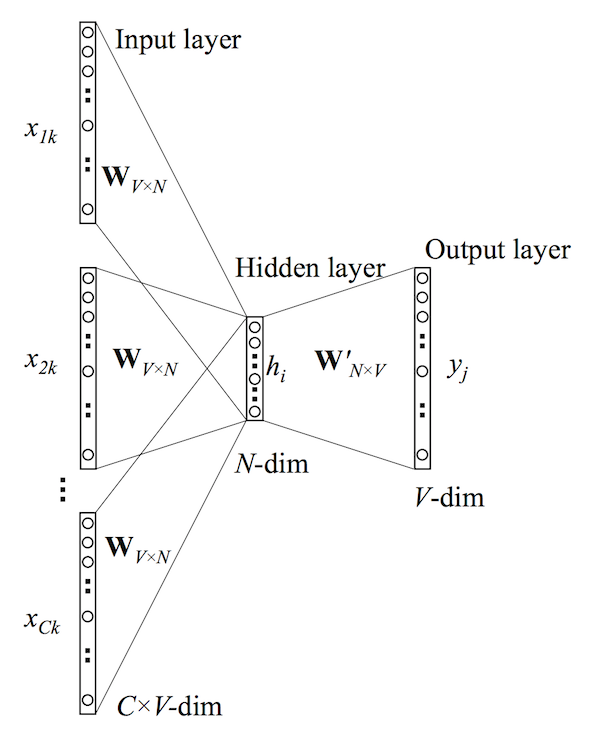

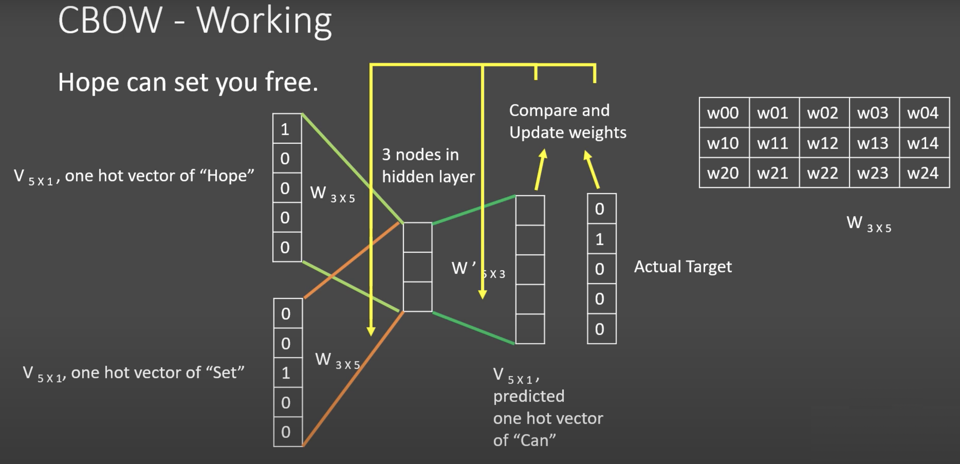

### Skip-gram word2vec

The input to the model is 𝑤𝑖, and the output could be 𝑤𝑖−1,𝑤𝑖−2,𝑤𝑖+1,𝑤𝑖+2. So the task here is

>**"predicting the context given a word"**

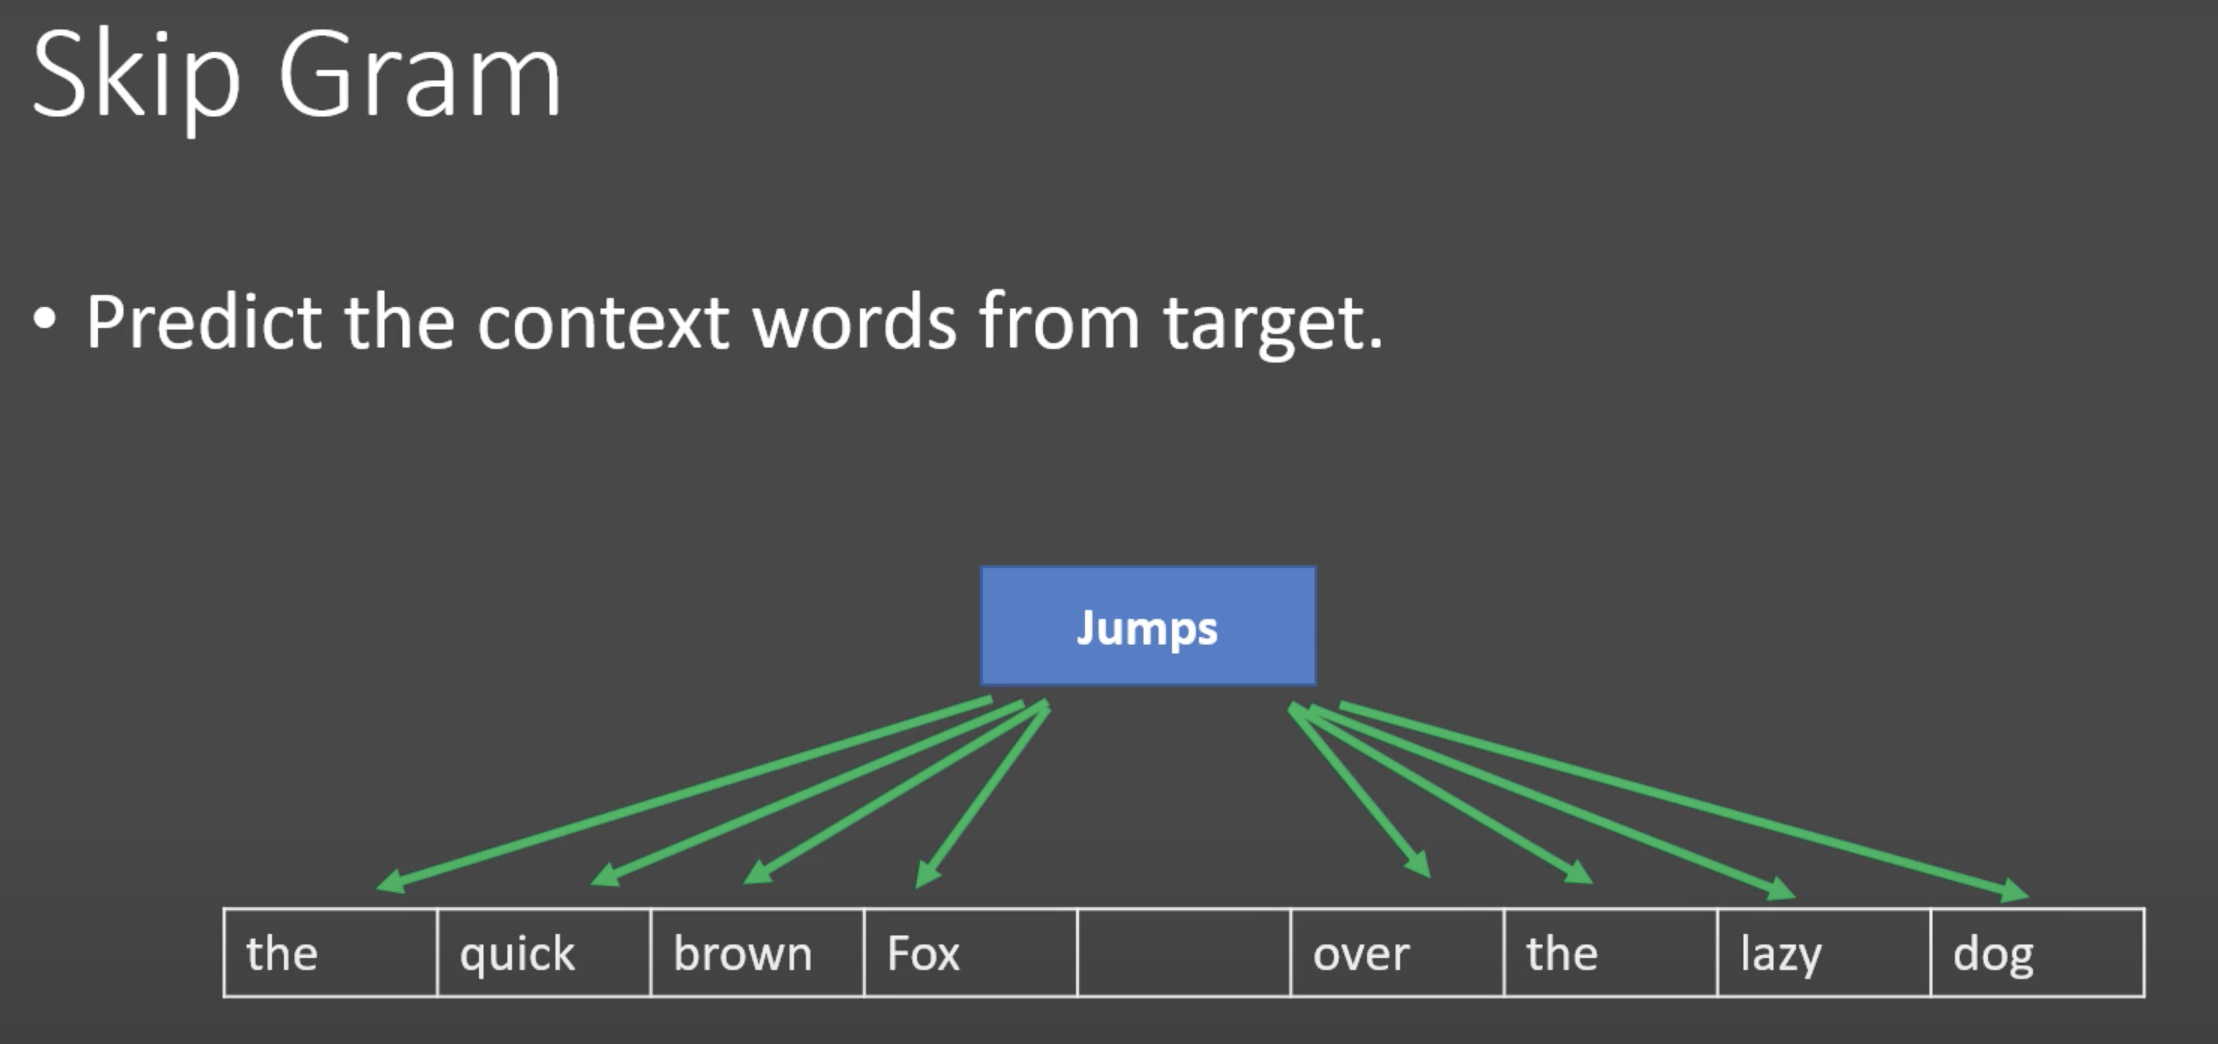

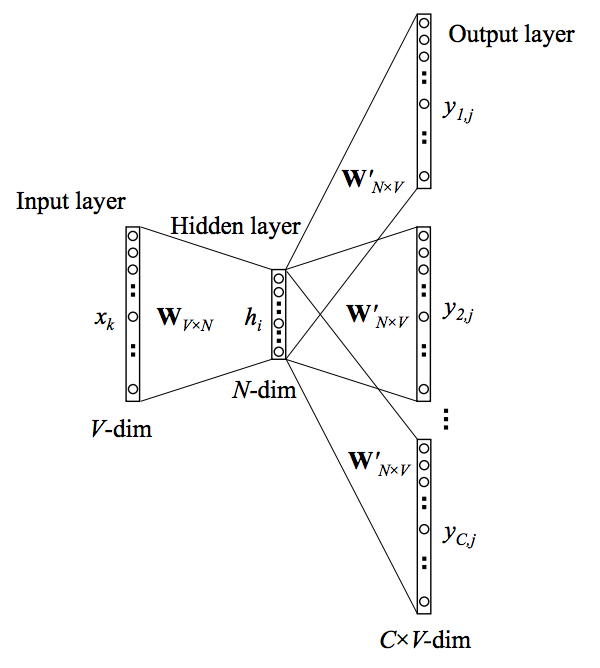

Train a simple neural network with a single hidden layer to perform a certain task. 

We’re going to train the neural network to do the following.

> - Given a specific word in the middle of a sentence (the input word), look at the words nearby and pick one at random.
> - The network is going to tell us the probability for every word in our vocabulary of being the “nearby word” that 
we chose.

The output probabilities are going to relate to how likely it is to find each vocabulary word nearby our input word.

For example, if you gave the trained network the input word “Soviet”, the output probabilities are going to be much higher for words like “Union” and “Russia” than for unrelated words like “watermelon” and “kangaroo”.

We’ll train the neural network to do this by feeding it word pairs found in our training documents. The below example shows some of the training samples (word pairs) we would take from the sentence “The quick brown fox jumps over the lazy dog.” I’ve used a small window size of 2 just for the example. The word highlighted in blue is the input word.

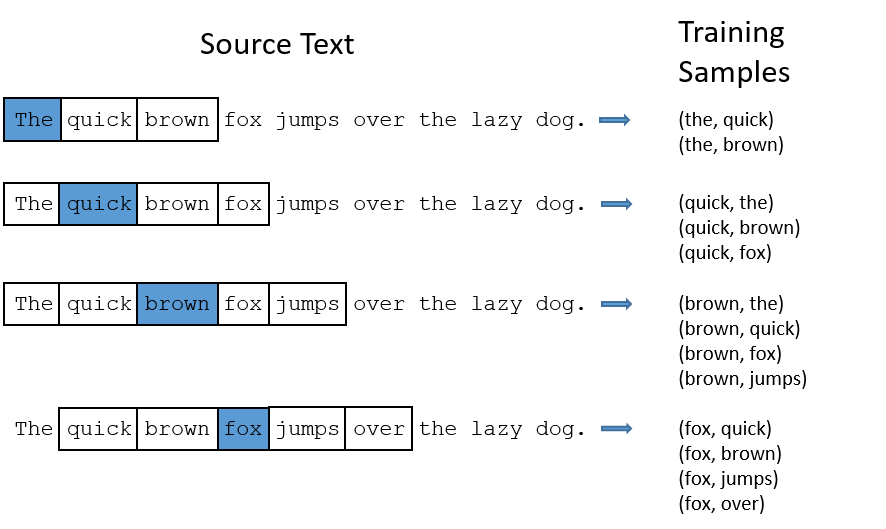



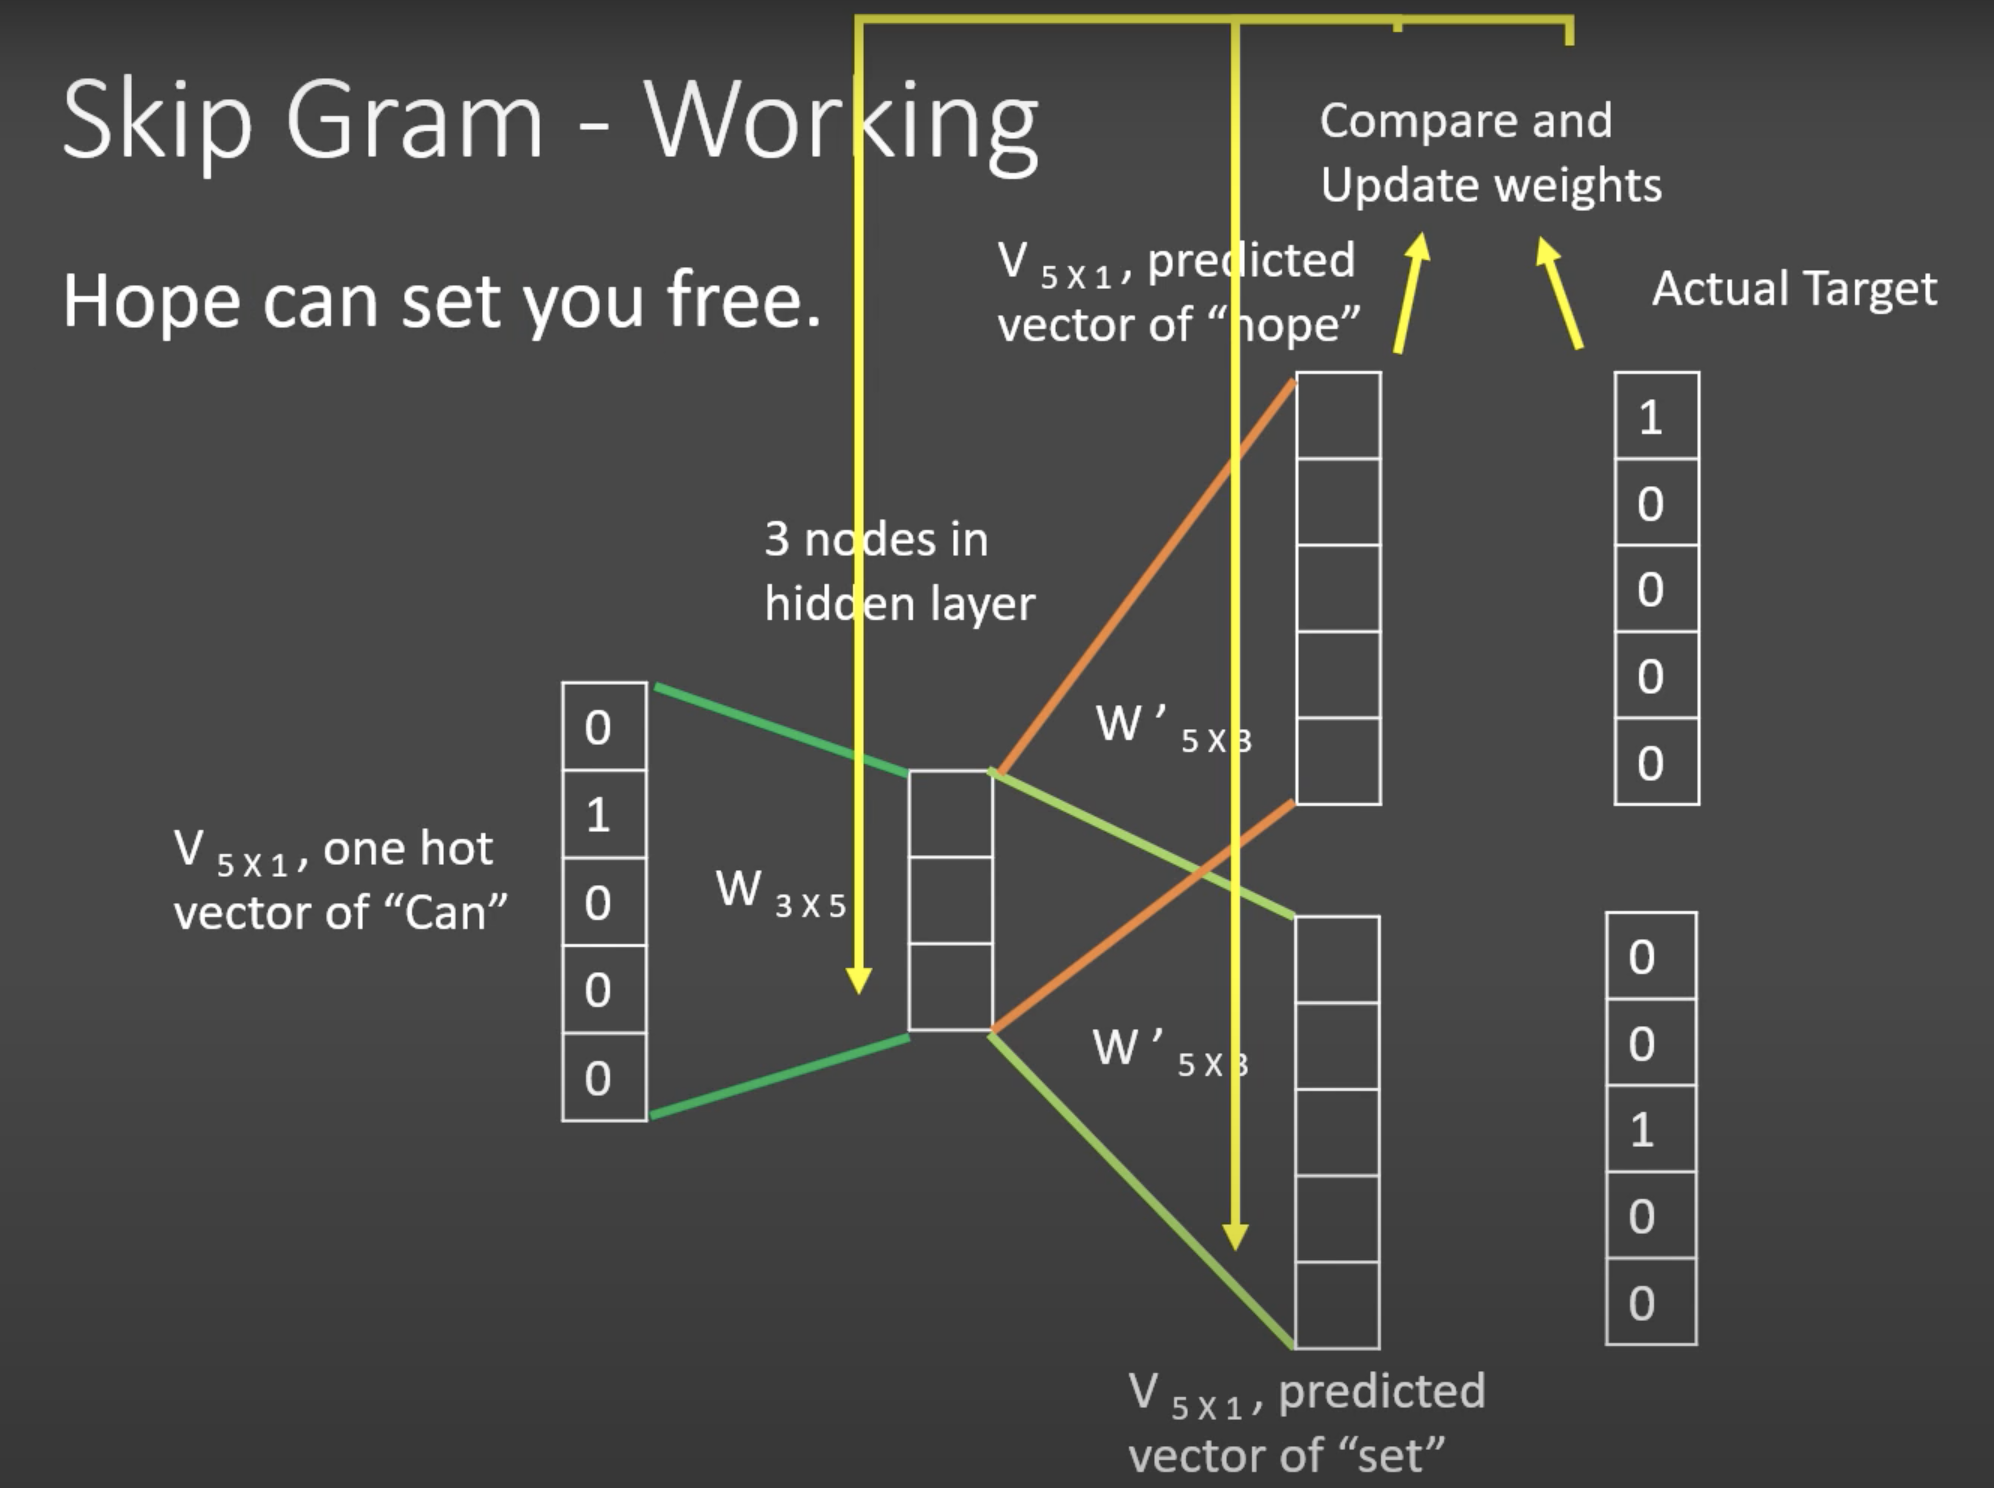

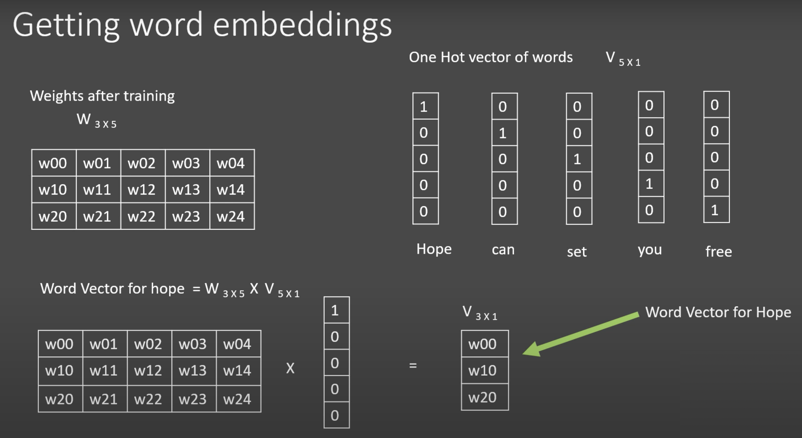

#### Model Details

So how is this all represented?

- First of all, you know you can’t feed a word just as a text string to a neural network, so we need a way to represent the words to the network. To do this, we first build a vocabulary of words from our training documents–let’s say we have a vocabulary of 10,000 unique words.
- We’re going to represent an input word like “ants” as a one-hot vector. This vector will have 10,000 components (one for every word in our vocabulary) and we’ll place a “1” in the position corresponding to the word “ants”, and 0s in all of the other positions.
- The output of the network is a single vector (also with 10,000 components) containing, for every word in our vocabulary, the probability that a randomly selected nearby word is that vocabulary word.

Here’s the architecture of our neural network.

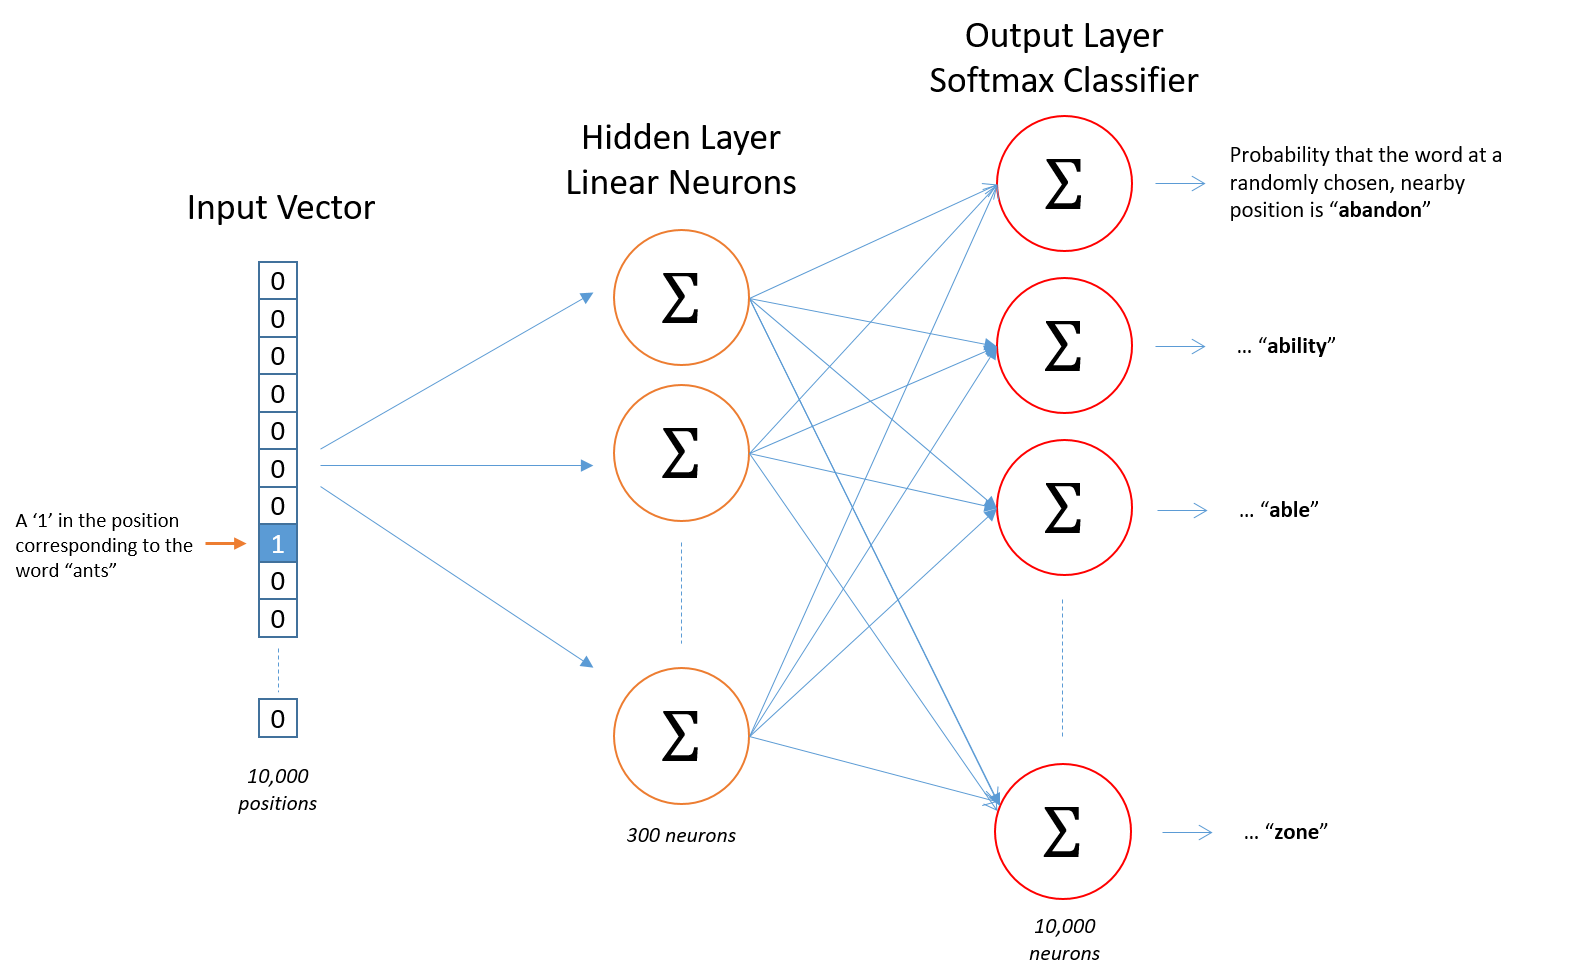

> There is no activation function on the hidden layer neurons, but the output neurons use softmax.

- When training this network on word pairs, the input is a one-hot vector representing the input word and the training output is also a one-hot vector representing the output word. But when you evaluate the trained network on an input word, the output vector will actually be a probability distribution (i.e., a bunch of floating point values, not a one-hot vector).

**The Hidden Layer**

- For our example, we’re going to say that we’re learning word vectors with 300 features. So the hidden layer is going to be represented by a weight matrix with 10,000 rows (one for every word in our vocabulary) and 300 columns (one for every hidden neuron).
- 300 features is what Google used in their published model trained on the Google news dataset (you can download it from https://code.google.com/archive/p/word2vec/). The number of features is a "hyper parameter" that you would just have to tune to your application (that is, try different values and see what yields the best results).
- If you look at the rows of this weight matrix, these are actually what will be our word vectors!

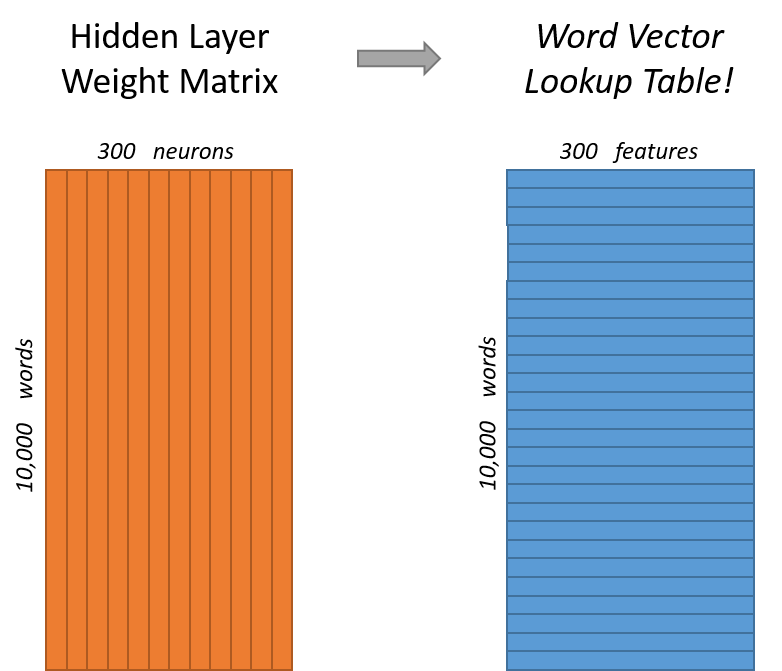

Now, you might be asking yourself–“That one-hot vector is almost all zeros… what’s the effect of that?” If you multiply a 1 x 10,000 one-hot vector by a 10,000 x 300 matrix, it will effectively just select the matrix row corresponding to the “1”. Here’s a small example to give you a visual.

The embedding matrix has a size of the number of words by the number of neurons in the hidden layer. So, if you have 10,000 words and 300 hidden units, the matrix will have size  10,000×300 . Remember that we're using one-hot encoded vectors for our inputs. When you do the matrix multiplication of the one-hot vector with the embedding matrix, you end up selecting only one row out of the entire matrix:

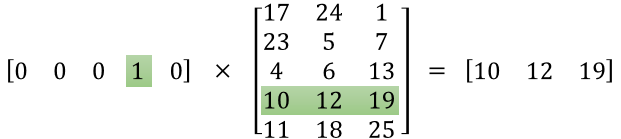

> **This means that** 

- the hidden layer of this model is really just operating as a lookup table.
- The output of the hidden layer is just the “word vector” for the input word.



You don't actually need to do the matrix multiplication, you just need to select the row in the embedding matrix that corresponds to the input word. Then, the embedding matrix becomes a lookup table, you're looking up a vector the size of the hidden layer that represents the input word.

**The Output Layer**

- The 1 x 300 word vector for “ants” then gets fed to the output layer.
- The output layer is a softmax regression classifier.
- But the gist of it is that each output neuron (one per word in our vocabulary!) will produce an output between 0 and 1.
- And the sum of all these output values will add up to 1.

Here’s an illustration of calculating the output of the output neuron for the word “car”.

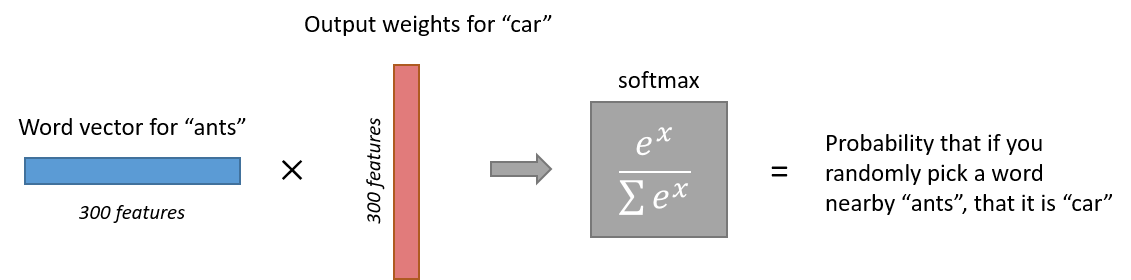

- If two different words have very similar “contexts”, then our model needs to output very similar results for these two words.
- And one way for the network to output similar context predictions for these two words is if the word vectors are similar.
- So, if two words have similar contexts, then our network is motivated to learn similar word vectors for these two words!

**Problems with this Model**

> In the example I gave, we had word vectors with 300 components, and a vocabulary of 10,000 words. Recall that the neural network had two weight matrices–a hidden layer and output layer. Both of these layers would have a weight matrix with 300 x 10,000 = 3 million weights each!

> You need a huge amount of training data in order to tune that many weights and avoid over-fitting.

> millions of weights times billions of training samples means that training this model is going to be a beast.

**The authors of Word2Vec addressed these issues in their second paper.** 

There are three innovations in this second paper:

- Treating common word pairs or phrases as single “words” in their model.
- Subsampling frequent words to decrease the number of training examples.
- Modifying the optimization objective with a technique they called “Negative Sampling”, which causes each training sample to update only a small percentage of the model’s weights.

It’s worth noting that subsampling frequent words and applying Negative Sampling not only reduced the compute burden of the training process, but also improved the quality of their resulting word vectors as well.

**Solution**

- Subsampling
- Negative Sampling

**Subsampling:**

There are two “problems” with common words like “the”:

- When looking at word pairs, (“fox”, “the”) doesn’t tell us much about the meaning of “fox”. “the” appears in the context of pretty much every word.
- We will have many more samples of (“the”, …) than we need to learn a good vector for “the”.

Word2Vec implements a “subsampling” scheme to address this.

- For each word we encounter in our training text, there is a chance that we will effectively delete it from the text.
- The probability that we cut the word is related to the word’s frequency.

If we have a window size of 10, and we remove a specific instance of “the” from our text:

- As we train on the remaining words, “the” will not appear in any of their context windows.
- We’ll have 10 fewer training samples where “the” is the input word.

**Negative Sampling:**

As we discussed above, the size of our word vocabulary means that our skip-gram neural network has a tremendous number of weights, all of which would be updated slightly by every one of our billions of training samples!

> **Negative sampling addresses this by having each training sample only modify a small percentage of the weights, rather than all of them. Here’s how it works.**

> **Essentially, the probability for selecting a word as a negative sample is related to its frequency, with more frequent words being more likely to be selected as negative samples.**

In the hidden layer, only the weights for the input word are updated (this is true whether you’re using Negative Sampling or not).

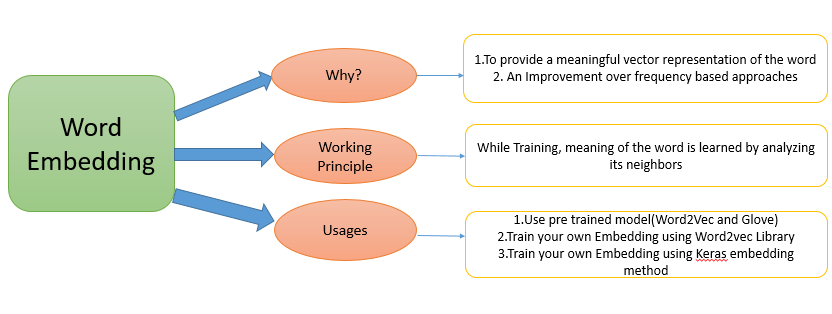

# Training own word2vec model

In [18]:
# define tokenized senences as training data
tokenized_sentences = [['Hi','I','welcome','you','all','to','learn','NLP'],
                   ['Hi','this','tutorial','is','regarding','word','embedding'],
                   ['you','will','learn','here','different','types','word','embedding','techniques'],
                   ['you','will','also','learn','about','word2vec','model']]

In [19]:
# training word2vec model
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')
mymodel = Word2Vec(tokenized_sentences, min_count=1)

/Applications/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [20]:
# summarizing the loaded model
print(mymodel)

Word2Vec(vocab=23, vector_size=100, alpha=0.025)


In [21]:
# summarize vocabulary
words = list(mymodel.wv.key_to_index)

In [22]:
# summarize vocabulary
print(words)

['you', 'learn', 'Hi', 'will', 'embedding', 'word', 'tutorial', 'I', 'welcome', 'all', 'to', 'NLP', 'this', 'model', 'is', 'word2vec', 'here', 'different', 'types', 'techniques', 'also', 'about', 'regarding']


In [23]:
# access word vector for one word "training"
print(mymodel.wv['welcome'])

[-9.5829573e-03  8.9472942e-03  4.1685491e-03  9.2349509e-03
  6.6486215e-03  2.9239519e-03  9.8091960e-03 -4.4247732e-03
 -6.8055778e-03  4.2265733e-03  3.7278666e-03 -5.6693880e-03
  9.7082015e-03 -3.5577787e-03  9.5537165e-03  8.3414273e-04
 -6.3376976e-03 -1.9742362e-03 -7.3778410e-03 -2.9807452e-03
  1.0447650e-03  9.4830617e-03  9.3587702e-03 -6.5997429e-03
  3.4771280e-03  2.2773882e-03 -2.4902273e-03 -9.2337197e-03
  1.0268509e-03 -8.1655970e-03  6.3230400e-03 -5.8009778e-03
  5.5341548e-03  9.8327305e-03 -1.5704196e-04  4.5315749e-03
 -1.8108318e-03  7.3651485e-03  3.9453446e-03 -9.0107331e-03
 -2.3944727e-03  3.6252106e-03 -9.9923047e-05 -1.2007871e-03
 -1.0558058e-03 -1.6713084e-03  6.0462934e-04  4.1642007e-03
 -4.2530871e-03 -3.8355070e-03 -4.9771570e-05  2.6941326e-04
 -1.6743130e-04 -4.7880709e-03  4.3169619e-03 -2.1696959e-03
  2.1076149e-03  6.6837354e-04  5.9703784e-03 -6.8407087e-03
 -6.8204515e-03 -4.4787587e-03  9.4338497e-03 -1.5924891e-03
 -9.4275940e-03 -5.44109

In [24]:
#try finding most similar words for word "Data"
mymodel.wv.most_similar("welcome")

[('Hi', 0.19909732043743134),
 ('techniques', 0.09668001532554626),
 ('will', 0.07501426339149475),
 ('word', 0.060602739453315735),
 ('all', 0.044700488448143005),
 ('NLP', 0.037617411464452744),
 ('learn', 0.0340595506131649),
 ('you', 0.026934601366519928),
 ('to', 0.026784194633364677),
 ('types', 0.015532905235886574)]

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

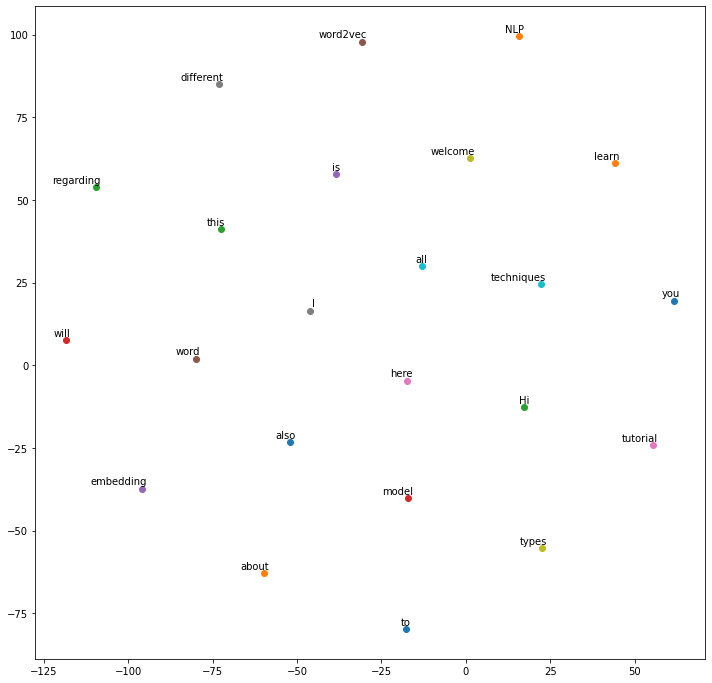

In [36]:
tsne_plot(mymodel)

#  Using Pre Trained Word2Vec Model

In [58]:
from gensim.models import KeyedVectors   
import os 
# os.chdir("F:\\")

Download GoogleNews-vectors-negative300.bin from 
https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [59]:
PreTrainedModel = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [60]:
# calculate: (king - man) + woman = ?
result = PreTrainedModel.most_similar("Data")
print(result)

[('data', 0.7262316346168518), ('Termed_Massively_Parallel', 0.5460323691368103), ('Data_System_IPEDS', 0.5428394079208374), ('Temperature_Maps', 0.5223192572593689), ('Analytics_Solution', 0.49304071068763733), ('Database', 0.4912521541118622), ('Partition_Master', 0.48701369762420654), ('QuickStudy', 0.48598507046699524), ('Geospatial_Data', 0.4815930426120758), ('Tweet_Sentiments_web', 0.4777469038963318)]


In [61]:
PreTrainedModel.similarity('france', 'spain')

0.6375304

In [62]:
PreTrainedModel.similarity('king', 'queen')

0.6510957

In [66]:
PreTrainedModel.similarity('apple', 'fruit')

0.6410147

# Application of word embedding

## Sentence Classification using Keras Embedding

### Data preprocessing and embedding

In [117]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
Sent = ['how are you',
        'what is your name',
        'how old are you',
        'I am good',
        'My name is Deepali',
        'My age is 29']

In [118]:
from collections import Counter
Counter(' '.join(Sent).split())

Counter({'how': 2,
         'are': 2,
         'you': 2,
         'what': 1,
         'is': 3,
         'your': 1,
         'name': 2,
         'old': 1,
         'I': 1,
         'am': 1,
         'good': 1,
         'My': 2,
         'Deepali': 1,
         'age': 1,
         '29': 1})

In [119]:
# defining class labels
sent_labels = array([1,1,1,0,0,0])

In [146]:
# integer encoding of the documents
my_vocab_size = 30
#my_vocab_size = len(Counter(' '.join(Sent).split()))
encoded_sent = [one_hot(i, my_vocab_size) for i in Sent]
print(encoded_sent)

[[24, 28, 22], [8, 24, 22, 17], [24, 17, 28, 22], [7, 3, 22], [24, 17, 24, 15], [24, 10, 24, 11]]


In [147]:
# padding documents to a max length =5 
length = 5
#length=max([len(i.split()) for i in Sent])
padded_sent = pad_sequences(encoded_sent, maxlen=length, padding='pre')
print(padded_sent)

[[ 0  0 24 28 22]
 [ 0  8 24 22 17]
 [ 0 24 17 28 22]
 [ 0  0  7  3 22]
 [ 0 24 17 24 15]
 [ 0 24 10 24 11]]


### Create classification model

In [148]:
# defining the model
mymodel = Sequential()
max_length = 5
mymodel.add(Embedding(my_vocab_size, 8, input_length=max_length))
mymodel.add(Flatten())
mymodel.add(Dense(1, activation='sigmoid'))
mymodel.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 5, 8)              240       
_________________________________________________________________
flatten_10 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 41        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [149]:
# compiling the model
mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Model training

In [155]:
# fiting  the model
mymodel.fit(padded_sent, sent_labels, epochs=30)

# evaluate the model
modelloss, modelaccuracy = mymodel.evaluate(padded_sent, sent_labels, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))

Epoch 1/30
1/1 [==============================] - 0s 26ms/step - loss: 0.6491 - accuracy: 0.8333
Epoch 2/30
1/1 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.8333
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.8333
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.8333
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.8333
Epoch 6/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.8333
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.8333
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.8333
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 0.6349 - accuracy: 0.8333
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6331 - accuracy: 1.0000
Epoch 11/30
1/1 [=====================

### Prediction 

In [156]:
mysent_to_predict = ['What will you prefer coffee or tea',
        'I am good']

In [157]:
# integer encode the documents
vocab_size = 30
encoded = [one_hot(d, vocab_size) for d in mysent_to_predict]
print(encoded)


[[8, 24, 22, 20, 28, 23, 20], [7, 3, 22]]


In [159]:
# pad documents to a max length of 5 words
max_length = 7
mypadded = pad_sequences(encoded, maxlen=max_length, padding='pre')
print(mypadded)

[[ 8 24 22 20 28 23 20]
 [ 0  0  0  0  7  3 22]]


In [154]:
mymodel.predict_classes(mypadded)

array([[1],
       [0]], dtype=int32)

### Improving the accuracy:

1. By selecting the appropriate model (CBOW/Skipgram)
    - Skipgram: for large corpus, higher dimensions, but it will be slow
    - CBOW: for small corpus, and faster implementation

2. Increasing the training set

3. Increasing the vector dimensions

4. Increasing the window size




# Sentence Embedding
It allows to train and infer numerical representations of whole sentences instead of single words.

## Doc2Vec Gensim model

Doc2Vec Gensim model, as opposite to Word2Vec model, is used to create a vectorised representation of a group of words taken collectively as a single unit.

Doc2vec (also known as: paragraph2vec or sentence embedding) is the modified version of word2vec. The main objective of doc2vec is to convert sentence or paragraph to vector (numeric) form.

In [81]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
import gensim.downloader as api

dataset = api.load("text8")
data = [d for d in dataset]
print(len(data))
data[0]

1701


['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

In [82]:
def tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

data_for_training = list(tagged_document(data[:100]))
print(data_for_training[:1]) #data_for_training[0]

model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)

[TaggedDocument(words=['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers'

In [83]:
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [89]:
print(model.infer_vector("violent means to destroy the organization".split()))

[-0.19624102 -0.15590225 -0.49760482  0.25471497  0.1254302   0.03964927
 -0.11832276  0.14641936 -0.25981796  0.13731898  0.02890186  0.04419524
 -0.28377214 -0.19257759  0.02701075 -0.2714082   0.24864547 -0.05906599
 -0.34346554 -0.02547586 -0.06498957 -0.02915114  0.14025326  0.21938615
 -0.20436572  0.10899051 -0.23183313 -0.23927887  0.02959604 -0.00773486
 -0.04584773  0.11250772 -0.14306179 -0.04623483 -0.14656235  0.20103908
  0.09254114 -0.21429324 -0.11731964  0.04143677]


In [85]:
data_for_training[1]

#data_for_training[1].words, data_for_training[1].tags

TaggedDocument(words=['reciprocity', 'qualitative', 'impairments', 'in', 'communication', 'as', 'manifested', 'by', 'at', 'least', 'one', 'of', 'the', 'following', 'delay', 'in', 'or', 'total', 'lack', 'of', 'the', 'development', 'of', 'spoken', 'language', 'not', 'accompanied', 'by', 'an', 'attempt', 'to', 'compensate', 'through', 'alternative', 'modes', 'of', 'communication', 'such', 'as', 'gesture', 'or', 'mime', 'in', 'individuals', 'with', 'adequate', 'speech', 'marked', 'impairment', 'in', 'the', 'ability', 'to', 'initiate', 'or', 'sustain', 'a', 'conversation', 'with', 'others', 'stereotyped', 'and', 'repetitive', 'use', 'of', 'language', 'or', 'idiosyncratic', 'language', 'lack', 'of', 'varied', 'spontaneous', 'make', 'believe', 'play', 'or', 'social', 'imitative', 'play', 'appropriate', 'to', 'developmental', 'level', 'restricted', 'repetitive', 'and', 'stereotyped', 'patterns', 'of', 'behavior', 'interests', 'and', 'activities', 'as', 'manifested', 'by', 'at', 'least', 'one',

In [86]:
model.docvecs[1]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  """Entry point for launching an IPython kernel.


array([-4.233945  , -6.5905514 , -3.3700998 , -2.9334822 ,  0.9734849 ,
       -2.13028   ,  3.1493146 ,  1.9943613 , -6.349933  , -0.11139264,
        3.0002747 ,  4.4420285 , -3.0392308 , -1.555317  , -1.7333827 ,
       -5.939412  ,  3.4567237 , -7.599703  , -1.6023318 , -3.303257  ,
        2.2134755 , 11.524467  ,  2.578604  ,  1.8405868 ,  1.2516133 ,
       -4.2415957 , -3.3127904 , -7.5179586 , -2.720287  ,  0.25853178,
        7.5716367 , 10.188199  , -1.5389749 , -0.6104047 ,  2.4890225 ,
       -6.953999  ,  5.5458097 , -5.2209706 , -0.1437214 ,  6.3615284 ],
      dtype=float32)

In [87]:
model.docvecs.most_similar(0)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  """Entry point for launching an IPython kernel.


[(57, 0.6160111427307129),
 (56, 0.6099898219108582),
 (4, 0.5444471836090088),
 (42, 0.5106928944587708),
 (46, 0.4840967059135437),
 (93, 0.4712378978729248),
 (49, 0.45384788513183594),
 (55, 0.4208667278289795),
 (68, 0.41552603244781494),
 (1, 0.4135552644729614)]

In [88]:
model.similarity_unseen_docs('Deepali Chandel'.split(), 'Deepali Chandel'.split())

1.0

## How to Use the “Sent2Vec” Python package

The open-source sent2vec Python library allows you to encode sentences with high flexibility. 
Sent2Vec has many dependencies on other libraries. The module requires the following libraries:

* gensim  
* numpy
* spacy  
* transformers  
* torch  

In [10]:
!pip3 install sent2vec

In [64]:
from scipy import spatial
from sent2vec.vectorizer import Vectorizer


sentences = [
    "This is an awesome book to learn NLP.",
    "DistilBERT is an amazing NLP model.",
    "We can interchangeably use embedding, encoding, or vectorizing.",
]

vectorizer = Vectorizer()
vectorizer.bert(sentences)
vectors_bert = vectorizer.vectors
vectors_bert

array([[-1.37952894e-01, -2.76443422e-01,  2.24870183e-02, ...,
        -6.81557925e-03,  4.14129674e-01,  2.54924327e-01],
       [-4.11927491e-01, -2.15563729e-01, -6.60568476e-05, ...,
        -2.13206951e-02,  3.54101777e-01,  4.36670661e-01],
       [-2.52007425e-01, -3.64548713e-02, -2.73512661e-01, ...,
        -3.02219242e-02, -1.22283444e-01,  6.59053326e-01]], dtype=float32)

In [65]:
vectors_bert[0]

array([-1.37952894e-01, -2.76443422e-01,  2.24870183e-02, -2.29733825e-01,
       -1.93399593e-01, -4.05403495e-01,  1.06999055e-01,  4.48913246e-01,
       -1.87438980e-01, -2.34245330e-01, -3.70098799e-02, -5.33546954e-02,
        9.06405896e-02,  1.72064885e-01,  4.31376100e-02,  6.77790716e-02,
       -3.53053287e-02,  2.73567230e-01, -3.98084372e-02, -2.73272574e-01,
       -1.32137001e-01, -2.40200788e-01,  1.23297028e-01, -9.15265381e-02,
        2.27163360e-02,  1.94566697e-03,  6.66092038e-02,  1.27315819e-01,
        9.73864570e-02, -7.86391348e-02, -4.31831591e-02,  7.70192593e-02,
       -9.78470966e-02,  4.90236282e-03,  7.86971003e-02, -3.34204957e-02,
       -1.76411122e-03,  9.21406373e-02,  1.69815987e-01,  3.54134217e-02,
       -1.97526589e-02,  1.30427212e-01,  1.52874693e-01, -7.77983665e-03,
       -6.33328408e-03, -1.50408208e-01, -2.36326575e+00,  1.04091056e-01,
       -2.78869212e-01, -2.94767141e-01,  1.80658743e-01,  1.27253175e-01,
        1.68180987e-01,  

In [66]:
dist_1 = spatial.distance.cosine(vectors_bert[0], vectors_bert[1])
dist_2 = spatial.distance.cosine(vectors_bert[0], vectors_bert[2])
print('dist_1: {0}, dist_2: {1}'.format(dist_1, dist_2))

dist_1: 0.042955875396728516, dist_2: 0.19213342666625977


In [63]:
vectorizer.vectors

array([[-1.37952894e-01, -2.76443422e-01,  2.24870183e-02, ...,
        -6.81557925e-03,  4.14129674e-01,  2.54924327e-01],
       [-4.11927491e-01, -2.15563729e-01, -6.60568476e-05, ...,
        -2.13206951e-02,  3.54101777e-01,  4.36670661e-01],
       [-2.52007425e-01, -3.64548713e-02, -2.73512661e-01, ...,
        -3.02219242e-02, -1.22283444e-01,  6.59053326e-01]], dtype=float32)

You can compute distance among sentences by using their vectors. In the example, as expected, the distance between vectors[0] and vectors[1] is less than the distance between vectors[0] and vectors[2].

# References

https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

https://towardsdatascience.com/how-to-compute-sentence-similarity-using-bert-and-word2vec-ab0663a5d64

https://www.youtube.com/watch?v=UqRCEmrv1gQ

https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285

https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

https://towardsdatascience.com/word-embedding-with-word2vec-and-fasttext-a209c1d3e12c

https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

https://www.analyticsvidhya.com/blog/2017/10/essential-nlp-guide-data-scientists-top-10-nlp-tasks/word-vectors-2/

http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/

https://towardsdatascience.com/word2vec-skip-gram-model-part-2-implementation-in-tf-7efdf6f58a27

https://towardsdatascience.com/word2vec-skip-gram-model-part-1-intuition-78614e4d6e0b

https://www.youtube.com/watch?v=MtM9QrCjuK4&t=52s

https://github.com/rsreetech/Word2VecCustomModel